In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [549]:
red_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-red.csv", sep=';')
white_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-white.csv", sep=';')
wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winemerged_data.csv")

In [550]:
wine.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,outliers,quality_category
0,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN,lower quality
1,red wine,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,NaN,lower quality
2,red wine,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,NaN,lower quality
3,red wine,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,NaN,medium quality
4,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN,lower quality


In [551]:
wine.drop(['outliers','quality_category'], axis = 1, inplace=True)

In [552]:
#in original DF was no categories
red_wine['quality_category'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value < 7 else 'high')
white_wine['quality_category'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value < 7 else 'high')

Skewness

In [553]:
skewness= wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('Merged wine', skewness.sort_values())

skewness_rw = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('Red wine', skewness_rw.sort_values())

skewness_ww = white_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('White wine', skewness_ww.sort_values())

'Merged wine'

total sulfur dioxide   -0.001177
pH                      0.386839
citric acid             0.471731
density                 0.503602
alcohol                 0.565718
free sulfur dioxide     1.220066
residual sugar          1.435404
volatile acidity        1.495097
fixed acidity           1.723290
sulphates               1.797270
chlorides               5.399828
dtype: float64

'Red wine'

density                 0.071288
pH                      0.193683
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

'White wine'

total sulfur dioxide    0.390710
pH                      0.457783
alcohol                 0.487342
fixed acidity           0.647751
sulphates               0.977194
density                 0.977773
residual sugar          1.077094
citric acid             1.281920
free sulfur dioxide     1.406745
volatile acidity        1.576980
chlorides               5.023331
dtype: float64

Kurtosis

In [554]:
kurtosis = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display('Merged wine', kurtosis.sort_values())

kurtosis_rw = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display(kurtosis_rw.sort_values())

kurtosis_ww = white_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display(kurtosis_ww.sort_values())


'Merged wine'

alcohol                 -0.531687
total sulfur dioxide    -0.371664
pH                       0.367657
citric acid              2.397239
volatile acidity         2.825372
residual sugar           4.359272
fixed acidity            5.061161
density                  6.606067
free sulfur dioxide      7.906238
sulphates                8.653699
chlorides               50.898051
dtype: float64

citric acid             -0.788998
alcohol                  0.200029
pH                       0.806943
density                  0.934079
fixed acidity            1.132143
volatile acidity         1.225542
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
sulphates               11.720251
residual sugar          28.617595
chlorides               41.715787
dtype: float64

alcohol                 -0.698425
pH                       0.530775
total sulfur dioxide     0.571853
sulphates                1.590930
fixed acidity            2.172178
residual sugar           3.469820
volatile acidity         5.091626
citric acid              6.174901
density                  9.793807
free sulfur dioxide     11.466342
chlorides               37.564600
dtype: float64

One-Hot Encoder for the wine type and the Label Encoder for the quality label.

In [555]:
# One-Hot Encoder "white" will have 0 in the "red" and a 1 in the "white"

OHE = OneHotEncoder()
wine_OHE = OHE.fit_transform(wine[['wine_type']])
wine_OHE_df = pd.DataFrame(wine_OHE.toarray(), columns=OHE.get_feature_names_out(['wine_type']))
wine = pd.concat([wine, wine_OHE_df], axis=1)

In [556]:
wine.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_red wine,wine_type_white wine
0,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,red wine,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,red wine,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,red wine,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,0.0
4,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


In [557]:
one_hot = pd.get_dummies(wine['wine_type'])
display(one_hot)

,red wine,white wine
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
6492,False,True
6493,False,True
6494,False,True
6495,False,True


In [558]:
# another way for One-Hot Encoder (run just one)
#wine = pd.get_dummies(wine, columns=['wine_type'], prefix=['wine_type'])

In [559]:
#in case of mistake
#wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winemerged_data.csv")
#wine.drop(['outliers','quality_category'], axis = 1, inplace=True)

In [560]:
wine.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_red wine,wine_type_white wine
0,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,red wine,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,red wine,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,red wine,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,0.0
4,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


In [561]:
# Label Encoding for 'quality_category'
label_encoder = LabelEncoder()
red_wine['quality_encoded'] = label_encoder.fit_transform(red_wine['quality_category'])
#white_wine['quality_encoded'] = label_encoder.fit_transform(white_wine['quality_category'])

In [562]:
red_wine.head(10)
#do we have to drop  quality_category then as well

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,high,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,high,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,low,1


In [563]:
# wine['wine_type'] = wine['wine_type'].astype('category')
red_wine['quality_category'] = pd.Categorical(red_wine['quality_category'], categories=['low', 'medium', 'high'], ordered=True)
white_wine['quality_category'] = pd.Categorical(white_wine['quality_category'], categories=['low', 'medium', 'high'], ordered=True)

In [564]:
from sklearn.linear_model import LinearRegression
Alcohol = red_wine["alcohol"] 
Volative_acidity = red_wine["volatile acidity"]
Citric_acid = red_wine["citric acid"]
Quality = red_wine["quality_encoded"] 

print(Alcohol.shape)
print(Quality.shape)

(1599,)
(1599,)


In [565]:
# Reshape the dfs to have value for the column instead of a null.
Alcohol = Alcohol.values.reshape(-1, 1)
Volative_acidity = Volative_acidity.values.reshape(-1, 1)
Citric_acid = Citric_acid.values.reshape(-1, 1)
Quality = Quality.values.reshape(-1, 1)

print(Citric_acid.shape)

(1599, 1)


In [566]:
Alcohol_train, Alcohol_test, Quality_train, Quality_test = train_test_split(Alcohol, Quality, test_size=0.2, random_state=27)
print(Alcohol_train)
print(Quality_train)

[[10.1]
 [ 9.5]
 [11.7]
 ...
 [ 9.4]
 [11. ]
 [10.9]]
[[2]
 [1]
 [2]
 ...
 [1]
 [2]
 [0]]


In [567]:
Volative_acidity_train, Volative_acidity_test, Quality_train, Quality_test = train_test_split(Volative_acidity, Quality, test_size=0.2, random_state=27)

In [568]:
Citric_acid_train, Citric_acid_test, Quality_train, Quality_test = train_test_split(Citric_acid, Quality, test_size=0.2, random_state=27)

In [569]:
# Train the model 
Alcohol_quality = linear_model.LinearRegression()
Alcohol_quality.fit(Alcohol_train, Quality_train)

LinearRegression()

In [570]:
Volative_acidity_quality = linear_model.LinearRegression()
Volative_acidity_quality.fit(Volative_acidity_train, Quality_train)

LinearRegression()

In [571]:
Citric_acid_quality = linear_model.LinearRegression()
Citric_acid_quality.fit(Citric_acid_train, Quality_train)

LinearRegression()

In [572]:
# Predict values using test data.
Alcohol_quality_score = (Alcohol_quality.score(Alcohol_test, Quality_test) * 100).round(2)
print("The accuracy of the ML model based on Alcohol is:", Alcohol_quality_score , "%")

Volative_acidity_quality_score = (Volative_acidity_quality.score(Volative_acidity_test, Quality_test) * 100).round(2)
print("The accuracy of the ML model based on Volative_acidity is:", Volative_acidity_quality_score , "%")

Citric_acid_quality_score = (Citric_acid_quality.score(Citric_acid_test, Quality_test) * 100).round(2)
print("The accuracy of the ML model based on Citric_acid is:", Citric_acid_quality_score , "%")

The accuracy of the ML model based on Alcohol is: 1.22 %
The accuracy of the ML model based on Volative_acidity is: 0.29 %
The accuracy of the ML model based on Citric_acid is: 0.5 %


In [573]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train, X_test, Y_test):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  # # Using SVC method of svm class to use Support Vector Machine Algorithm
  # from sklearn.svm import SVC
  # svc_lin = SVC(kernel = 'linear', random_state = 0)
  # svc_lin.fit(X_train, Y_train)

  # #Using SVC method of svm class to use Kernel SVM Algorithm
  # from sklearn.svm import SVC
  # svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  # svc_rbf.fit(X_train, Y_train)

  # #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  # from sklearn.naive_bayes import GaussianNB
  # gauss = GaussianNB()
  # gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(X_test, Y_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(X_test, Y_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(X_test, Y_test))
  # print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(Alcohol_test, Price_test))
  # print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(Alcohol_test, Price_test))
  # print('Gaussian Naive Bayes Training Accuracy:', gauss.score(Alcohol_test, Price_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(X_test, Y_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(X_test, Y_test))*100)

In [574]:
models(Alcohol_train, Quality_train, Alcohol_test, Quality_test)

Logistic Regression Training Accuracy: 58.75
Linear Regression Training Accuracy: 1.2226137445249585
K Nearest Neighbor Training Accuracy: 0.521875
Decision Tree Classifier Training Accuracy: 56.25
Random Forest Classifier Training Accuracy: 57.49999999999999


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [575]:
models(Volative_acidity_train, Quality_train, Volative_acidity_test, Quality_test)

Logistic Regression Training Accuracy: 49.375
Linear Regression Training Accuracy: 0.2887997988754609
K Nearest Neighbor Training Accuracy: 0.503125
Decision Tree Classifier Training Accuracy: 50.0
Random Forest Classifier Training Accuracy: 51.87500000000001


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [576]:
models(Citric_acid_train, Quality_train, Citric_acid_test, Quality_test)

Logistic Regression Training Accuracy: 47.8125
Linear Regression Training Accuracy: 0.500369925676436
K Nearest Neighbor Training Accuracy: 0.4375
Decision Tree Classifier Training Accuracy: 47.1875
Random Forest Classifier Training Accuracy: 46.25


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Multivariative Red Wine

In [577]:
red_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-red.csv", sep=';')
red_wine['quality_category'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
red_wine['quality_encoded'] = label_encoder.fit_transform(red_wine['quality_category'])

In [578]:
multivariate_MI = red_wine.drop(['density','fixed acidity', 'quality_category','residual sugar','free sulfur dioxide','pH'],axis='columns')
Quality_Enc = red_wine["quality_encoded"] 
Quality_Enc = Quality_Enc.values.reshape(-1, 1)

print(multivariate_MI.shape)
print(Quality_Enc.shape)

(1599, 8)
(1599, 1)


In [579]:
red_wine['quality_category'].value_counts()

quality_category
medium    837
low       744
high       18
Name: count, dtype: int64

In [580]:
multivariate_MI = multivariate_MI.drop(["quality_encoded", 'quality'],axis='columns') 

In [581]:
multivariate_MI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   chlorides             1599 non-null   float64
 3   total sulfur dioxide  1599 non-null   float64
 4   sulphates             1599 non-null   float64
 5   alcohol               1599 non-null   float64
dtypes: float64(6)
memory usage: 75.1 KB


In [582]:
multivariate_01_train, multivariate_01_test, Quality_Enc_train, Quality_Enc_test = train_test_split(multivariate_MI, Quality_Enc, test_size=0.2, random_state=42)

In [583]:
# Train the model 
red_multi_01 = linear_model.LinearRegression()
red_multi_01.fit(multivariate_01_train, Quality_Enc_train)

LinearRegression()

In [584]:
# Predict values using test data.
red_multi_score = (red_multi_01.score(multivariate_01_test, Quality_Enc_test) * 100).round(2)
print("The accuracy of the ML model is:", red_multi_score , "%")

The accuracy of the ML model is: 14.8 %


In [585]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(multivariate_01_test, Quality_Enc_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(multivariate_01_test, Quality_Enc_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(multivariate_01_test, Quality_Enc_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(multivariate_01_test, Quality_Enc_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(multivariate_01_test, Quality_Enc_test))*100)
  
  # return log, tree, forest

In [586]:
models(multivariate_01_train, Quality_Enc_train)

Logistic Regression Training Accuracy: 72.1875
Linear Regression Training Accuracy: 14.797455778511349
K Nearest Neighbor Training Accuracy: 0.653125
Decision Tree Classifier Training Accuracy: 73.75
Random Forest Classifier Training Accuracy: 77.1875


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [643]:
  #Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(max_depth =20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state = 0)
  forest.fit(multivariate_01_train, Quality_Enc_train.ravel())
  print('Random Forest Classifier Training Accuracy:', (forest.score(multivariate_01_test, Quality_Enc_test))*100)


Random Forest Classifier Training Accuracy: 79.375


(n_estimators = 200, max_depth = None) = Random Forest Classifier Training Accuracy: 75.9375

before it was Accuracy: 77.1875

In [588]:
# Train  using the RandomForestClassifier method
red_multitree = RandomForestClassifier()
red_multitree.fit(multivariate_01_train, Quality_Enc_train)

c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [589]:
quality_mapping = {
    0: "High Quality",
    1: "Medium Quality",
    2: "Low Quality"
}
# Enter the attributes ['volatile acidity	citric acid	chlorides	total sulfur dioxide	sulphates	alcohol']
predictions = [0.58, 0.03, 0.073, 16.0, 0.57, 9.6]

pred_result = red_multitree.predict([predictions]) 
predicted_quality = quality_mapping.get(pred_result[0], "Unknown Quality")

print(f"We probably have Red wine with : {predicted_quality}"
      f"\n Our characteristics are: volatile acidity: {predictions[0]}, citric acid: {predictions[1]}, chlorides: {predictions[2]}  "
      f"\ntotal sulfur dioxide: {predictions[3]}, sulphates: {predictions[4]}, alcohol: {predictions[5]}")

We probably have Red wine with : Medium Quality
 Our characteristics are: volatile acidity: 0.58, citric acid: 0.03, chlorides: 0.073  
total sulfur dioxide: 16.0, sulphates: 0.57, alcohol: 9.6


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [590]:
red_wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_encoded
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,medium,2
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,medium,2
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,low,1


Multivariative White_wine

In [591]:
white_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-white.csv", sep=';')
white_wine['quality_category'] = white_wine['quality'].apply(lambda value: '1' if value <= 5 else '2' if value <= 7 else '3')

In [592]:
white_wine.info()
white_wine['quality_category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality_category      4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


quality_category
2    3078
1    1640
3     180
Name: count, dtype: int64

In [593]:
multivariate_WW = white_wine[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']]
Quality = white_wine["quality_category"].values.reshape(-1, 1)

print(multivariate_WW.shape)
print(Quality.shape)

(4898, 5)
(4898, 1)


In [594]:
multivariate_WW.columns

Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')

In [595]:
multivariate_WW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      4898 non-null   float64
 1   chlorides             4898 non-null   float64
 2   total sulfur dioxide  4898 non-null   float64
 3   density               4898 non-null   float64
 4   alcohol               4898 non-null   float64
dtypes: float64(5)
memory usage: 191.5 KB


In [596]:
multi_ww_train, multi_ww_test, Quality_train, Quality_test = train_test_split(multivariate_WW, Quality, test_size=0.2, random_state=99)

In [597]:
# Train the model 
white_multi = linear_model.LinearRegression()
white_multi.fit(multi_ww_train, Quality_train)

LinearRegression()

In [598]:
# Predict values using test data.
white_multiscore = (white_multi.score(multi_ww_test, Quality_test) * 100).round(2)
print("The accuracy of the ML model is:", white_multiscore, "%")

The accuracy of the ML model is: 19.84 %


In [599]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(multi_ww_test, Quality_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(multi_ww_test, Quality_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(multi_ww_test, Quality_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(multi_ww_test, Quality_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(multi_ww_test, Quality_test))*100)

In [600]:
models(multi_ww_train, Quality_train)

c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Logistic Regression Training Accuracy: 70.40816326530613
Linear Regression Training Accuracy: 19.84019395403408
K Nearest Neighbor Training Accuracy: 0.6551020408163265
Decision Tree Classifier Training Accuracy: 72.44897959183673
Random Forest Classifier Training Accuracy: 78.16326530612245


In [620]:
WW_FOREST = RandomForestClassifier(n_estimators = 42, criterion = 'entropy', random_state = 0)
WW_FOREST.fit(multi_ww_train, Quality_train.ravel())
print('Random Forest Classifier Training Accuracy:', (WW_FOREST.score(multi_ww_test, Quality_test))*100)

Random Forest Classifier Training Accuracy: 79.6938775510204


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Training Accuracy: 0.6740643000495219

In [602]:
# Train  using the RandomForestClassifier method
white_multitree = RandomForestClassifier()
white_multitree.fit(multi_ww_train, Quality_train)

c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [603]:
quality_mapping = {'1':"Low Quality", '2': "Medium Quality", '3': "High Quality"}
# Enter the attributes ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']
predictions_ww = [0.27, 0.045, 170.0, 1.00100, 8.8]

pred_result = white_multitree.predict([predictions_ww]) 
predicted_quality_ww = quality_mapping.get(pred_result[0], "Unknown Quality")

print(f"We probably have White wine with : {predicted_quality_ww}"
      f"\n Our characteristics are: volatile acidity: {predictions_ww[0]}, chlorides: {predictions_ww[1]}, total sulfur dioxide: {predictions_ww[2]}  "
      f"\ndensity: {predictions_ww[3]}, alcohol: {predictions_ww[4]}"
      f"\nRandom Forest Classifier Training Accuracy:{WW_FOREST.score(multi_ww_test, Quality_test) * 100:.2f}%")

We probably have White wine with : Medium Quality
 Our characteristics are: volatile acidity: 0.27, chlorides: 0.045, total sulfur dioxide: 170.0  
density: 1.001, alcohol: 8.8
Random Forest Classifier Training Accuracy:79.69%


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [604]:
display(multivariate_WW, white_wine)

,volatile acidity,chlorides,total sulfur dioxide,density,alcohol
0,0.27,0.045,170.0,1.00100,8.8
1,0.30,0.049,132.0,0.99400,9.5
2,0.28,0.050,97.0,0.99510,10.1
3,0.23,0.058,186.0,0.99560,9.9
4,0.23,0.058,186.0,0.99560,9.9
...,...,...,...,...,...
4893,0.21,0.039,92.0,0.99114,11.2
4894,0.32,0.047,168.0,0.99490,9.6
4895,0.24,0.041,111.0,0.99254,9.4
4896,0.29,0.022,110.0,0.98869,12.8


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


Red or White wine?

In [605]:
wine = wine.drop('wine_type', axis=1)
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_red wine,wine_type_white wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,1.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,1.0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0.0,1.0


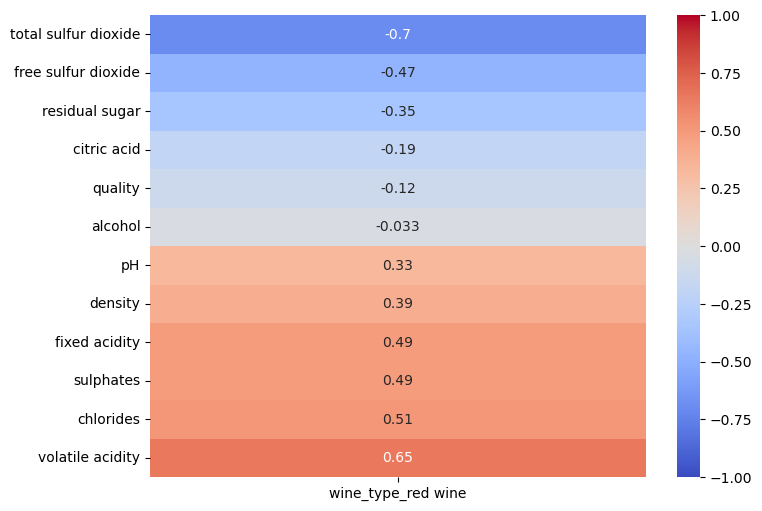

In [606]:
plt.figure(figsize=(8, 6))
correlation_with_red_wine = wine.corr()['wine_type_red wine'].drop(['wine_type_red wine','wine_type_white wine']).sort_values(ascending=True)
sns.heatmap(correlation_with_red_wine.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [607]:
which_wine = wine[['volatile acidity','chlorides', 'total sulfur dioxide', 'sulphates']] #testing with 4 parameters
which_wine_all = wine[['fixed acidity', 'volatile acidity','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']] #testing with 6 parameters result u see later
Wine_type = wine["wine_type_red wine"].values.reshape(-1, 1)


print(which_wine.shape)
print(which_wine_all.shape)
print(Wine_type.shape)

(6497, 4)
(6497, 6)
(6497, 1)


In [608]:
which_wine_train, which_wine_test, Wine_type_train, Wine_type_test = train_test_split(which_wine, Wine_type, test_size=0.2, random_state=42)
which_wine_all_train, which_wine_all_test, Wine_type_train, Wine_type_test = train_test_split(which_wine_all, Wine_type, test_size=0.2, random_state=42)

In [609]:
# Train the model 
wine_multi = linear_model.LinearRegression()
wine_multi.fit(which_wine_train, Wine_type_train)

LinearRegression()

In [610]:
# Train the model all
wine_multi1 = linear_model.LinearRegression()
wine_multi1.fit(which_wine_all_train, Wine_type_train)

LinearRegression()

In [611]:
wine_multiscore = (wine_multi.score(which_wine_test, Wine_type_test) * 100).round(2)
print('The accuracy of the ML model ist:', wine_multiscore, '%')

The accuracy of the ML model ist: 72.9 %


In [612]:
wine_multi1score = (wine_multi1.score(which_wine_all_test, Wine_type_test) * 100).round(2)
print('The accuracy of the ML model ist:', wine_multi1score, '%')

The accuracy of the ML model ist: 75.55 %


In [613]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(which_wine_test, Wine_type_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(which_wine_test, Wine_type_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(which_wine_test, Wine_type_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(which_wine_test, Wine_type_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(which_wine_test, Wine_type_test))*100)

In [614]:
models(which_wine_train, Wine_type_train)

Logistic Regression Training Accuracy: 96.23076923076923
Linear Regression Training Accuracy: 72.89927698196146
K Nearest Neighbor Training Accuracy: 0.9407692307692308
Decision Tree Classifier Training Accuracy: 98.53846153846155
Random Forest Classifier Training Accuracy: 98.53846153846155


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [615]:
models(which_wine_all_train, Wine_type_train) #it shows me that its not necessary to include all characteristics. changes are too small
# Logistic Regression Training Accuracy: 96.61
# Linear Regression Training Accuracy: 75.54
# K Nearest Neighbor Training Accuracy: 0.92
# Decision Tree Classifier Training Accuracy: 98.53
# Random Forest Classifier Training Accuracy: 98.84

c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- fixed acidity
- free sulfur dioxide


In [ ]:
# Chosed Logistic Regression Algorithm because it's simple fast and works good for binary classification
from sklearn.linear_model import LogisticRegression
wine_log_reg = LogisticRegression(C= 5, max_iter= 350, penalty= 'l1', solver= 'liblinear')
wine_log_reg .fit(which_wine_train, Wine_type_train.ravel())
print(f'Logistic Regression Algorithm Accuracy: {(wine_log_reg.score(which_wine_train, Wine_type_train)*100).round(2)}')

Logistic Regression Algorithm Accuracy: 97.67


before GridSearchCV: Logistic Regression Algorithm Accuracy: 97.04
another Grid (solver='lbfgs', max_iter=100, C=10, penalty='l2')  = Logistic Regression Algorithm Accuracy: 97.46

In [ ]:
wine_mapping = {1:"Red Wine", 0: "White wine"}
# Enter the attributes ['volatile acidity','chlorides', 'total sulfur dioxide', 'sulphates']
predictions_w = [0.21, 0.039, 90.0, 0.68]
pred_result = wine_log_reg.predict([predictions_w]) 
predicted_wine = wine_mapping.get(pred_result[0], "Unknown Wine")

print(f"We probably have: {predicted_wine}"
      f"\n Our characteristics are: volatile acidity: {predictions_w[0]}, chlorides: {predictions_w[1]},"
      f"\ntotal sulfur dioxide: {predictions_w[2]}, sulphates: {predictions_w[3]}")

We probably have: White wine
 Our characteristics are: volatile acidity: 0.21, chlorides: 0.039,
total sulfur dioxide: 90.0, sulphates: 0.68


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Predictions with predict.method and Confusion Matrix


In [ ]:
pred_wine = wine_log_reg.predict(which_wine_test)


In [ ]:
pred_wine

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
confusion = confusion_matrix(Wine_type_test, pred_wine)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[949  10]
 [ 31 310]]


In [ ]:
report = classification_report(Wine_type_test, pred_wine, target_names=["low","medium"])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         low       0.97      0.99      0.98       959
      medium       0.97      0.91      0.94       341

    accuracy                           0.97      1300
   macro avg       0.97      0.95      0.96      1300
weighted avg       0.97      0.97      0.97      1300



In [ ]:
kappa = cohen_kappa_score(pred_wine, Wine_type_test)
print("Cohen-Kappa score:", kappa)

Cohen-Kappa score: 0.9000552285079516


In [ ]:
def evaluate_model(model, X_test, y_true, target_names=None):
    y_pred = model.predict(X_test)

    confusion = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confusion)

    report = classification_report(y_true, y_pred, target_names=target_names)
    print("Classification Report:")
    print(report)

    kappa = cohen_kappa_score(y_pred, y_true)
    print("Cohen-Kappa score:", kappa)

In [ ]:
# Automatisation for wine_type
evaluate_model(wine_log_reg, which_wine_test, Wine_type_test, target_names=["White", "Red"])

Confusion Matrix:
[[949  10]
 [ 28 313]]
Classification Report:
              precision    recall  f1-score   support

       white       0.97      0.99      0.98       959
         Red       0.97      0.92      0.94       341

    accuracy                           0.97      1300
   macro avg       0.97      0.95      0.96      1300
weighted avg       0.97      0.97      0.97      1300

Cohen-Kappa score: 0.9231623514186967


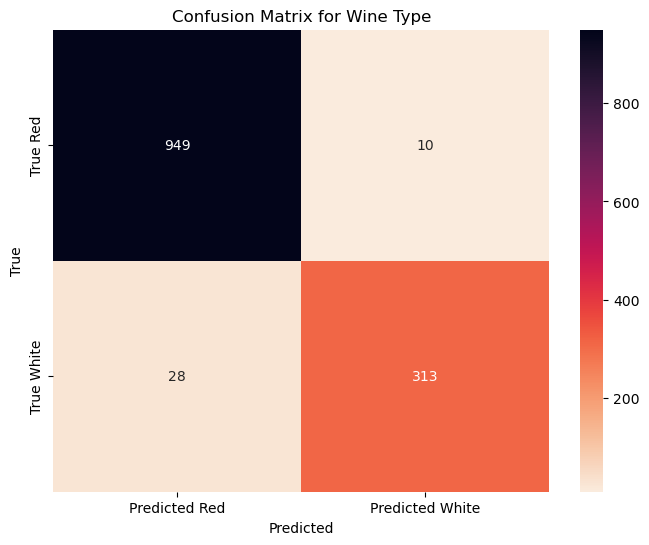

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", xticklabels=["Predicted Red", "Predicted White"], yticklabels=["True Red", "True White"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Wine Type")
plt.show()

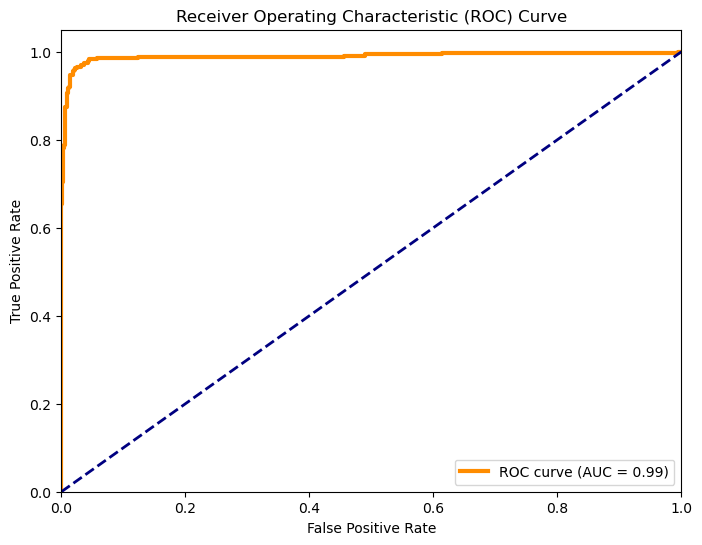

In [617]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_wine = wine_log_reg.predict(which_wine_test)
predicted_probabilities = wine_log_reg.predict_proba(which_wine_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(Wine_type_test, predicted_probabilities)
auc = roc_auc_score(Wine_type_test, predicted_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate') ; plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
#Make predictions for Quality of white wine
evaluate_model(white_multitree, multi_ww_test, Quality_test, ["low", "medium", "high"])

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Make predictions for Quality of red wine - target_names are different, cause I used encoded!
evaluate_model(red_multitree, multivariate_01_test, Quality_Enc_test, ["high", "low", "medium"])

Confusion Matrix:
[[  0   0   5]
 [  0 110  31]
 [  1  35 138]]
Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.76      0.78      0.77       141
      medium       0.79      0.79      0.79       174

    accuracy                           0.78       320
   macro avg       0.52      0.52      0.52       320
weighted avg       0.77      0.78      0.77       320

Cohen-Kappa score: 0.5541278012153115


GridSearchCV

In [ ]:
white_multitree = RandomForestClassifier()

param_grid = {
    'n_estimators': [200], # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    'max_depth': [None], #, 10, 20, 30],  
    'min_samples_split': [2], 
    'min_samples_leaf': [1],  
    'criterion': ['entropy'],
    'max_features': [None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=white_multitree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(multi_ww_train, Quality_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best Training Accuracy:", best_score)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\ensemble\_forest.py", 

Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200}
Best Training Accuracy: 0.7817753538196888


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Training Accuracy: 0.6740643000495219

In [ ]:
red_multitree = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_search = GridSearchCV(estimator=red_multitree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(multivariate_01_train, Quality_Enc_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_estimator = grid_search.best_estimator_

best_model_accuracy = best_estimator.score(multivariate_01_train, Quality_Enc_train)
print("Best Training Accuracy:", best_model_accuracy)


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Training Accuracy: 1.0


In [ ]:
wine_log_reg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10], 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [100, 200, 250, 300, 350, 400,450,500],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
#grid_search = GridSearchCV(estimator=wine_log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
#grid_search.fit(which_wine_train, Wine_type_train.ravel())
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_estimator = grid_search.best_estimator_
best_model_accuracy = best_estimator.score(which_wine_train, Wine_type_train)
print("Best Training Accuracy:", best_model_accuracy)


Best Parameters: {'C': 5, 'max_iter': 350, 'penalty': 'l1', 'solver': 'liblinear'}
Best Training Accuracy: 0.9767173369251492


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3080 fits failed out of a total of 6720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_log

Prices_dataset